# Практика

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [19]:
# ваш код тут
# например вот такое распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine
beta_rv = sts.beta(5, 3)
sample = beta_rv.rvs(100)
sample

array([0.54197847, 0.85113593, 0.78823701, 0.91458173, 0.61161831,
       0.58972897, 0.78553372, 0.39724935, 0.74354395, 0.72688613,
       0.58216514, 0.59383321, 0.61287157, 0.7653766 , 0.46021523,
       0.65426666, 0.48950057, 0.37447497, 0.48710839, 0.62186496,
       0.44553842, 0.88692527, 0.59190937, 0.54912599, 0.81903515,
       0.23489488, 0.67500881, 0.6596384 , 0.63711092, 0.66240958,
       0.65174332, 0.64411574, 0.74611662, 0.35457738, 0.66134287,
       0.57832538, 0.52340681, 0.61769336, 0.90271894, 0.30095258,
       0.372856  , 0.86123856, 0.54105626, 0.6740332 , 0.61517919,
       0.55611543, 0.83570622, 0.50471162, 0.74622901, 0.79963881,
       0.71627691, 0.68890349, 0.50620014, 0.54696769, 0.34185776,
       0.82229863, 0.78829648, 0.63368836, 0.68552598, 0.90954415,
       0.82112985, 0.67836717, 0.57354661, 0.5029435 , 0.41967255,
       0.58178931, 0.59639416, 0.32394974, 0.73298899, 0.65810767,
       0.67409651, 0.65738573, 0.88296883, 0.70297581, 0.63851

In [21]:
sample.dtype

dtype('float64')

In [22]:
real_mean = beta_rv.mean() # настоящее среднее случайной величины

In [23]:
real_mean

0.625

In [24]:
real_var = beta_rv.var() # настоящая дисперсия случайной величины

In [25]:
real_var

0.026041666666666668

In [33]:
real_std = beta_rv.std() # стандартное отклонение

In [34]:
real_std

0.1613743060919757

### Постройте гистограмму выборки и теоретическую плотность распределения

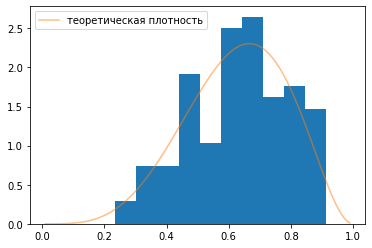

In [26]:
# ваш код тут
plt.hist(sample, density=True)
x = np.linspace(0.01,0.99,100)
pdf = beta_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [27]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

0.6337798737543491
0.025794656588879968


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

In [ ]:
# ваш код тут

In [51]:
for n in [10, 50, 100, 1000, 10000]:
# сгенерируем много выборочных средних
    means = []
for i in range(1000):
    means.append(np.mean(beta_rv.rvs(n)))

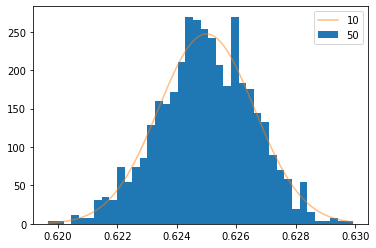

In [52]:
norm_rv = sts.norm(loc=real_mean, scale=real_std/np.sqrt(n))
plt.hist(means, density=True, bins=40)
x = np.linspace(np.min(means), np.max(means), 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.5)
plt.legend(['10', '50', '100', '1000', '10000'])
plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

In [ ]:
для выбранного распределения апроксимация распределения выборочного среднего работает хорошо, так как почти все средние попали в доверительный интервал

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [53]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [57]:
df = df[['total day calls', 'churn']]

In [58]:
df

,total day calls,churn
0,110,False
1,123,False
2,114,False
3,71,False
4,113,False
...,...,...
3328,77,False
3329,57,False
3330,109,False
3331,105,False


In [59]:
df_true = df[df['churn']==True]

In [60]:
df_true

,total day calls,churn
10,137,True
15,67,True
21,89,True
33,118,True
41,85,True
...,...,...
3301,113,True
3304,114,True
3320,101,True
3322,105,True


In [61]:
df_true.sort_values(by='total day calls')

,total day calls,churn
1345,0,True
1322,42,True
2884,44,True
2964,44,True
1346,45,True
...,...,...
1018,148,True
3190,151,True
580,151,True
1869,156,True


In [63]:
df_false = df[df['churn']==False]

In [64]:
df_false

,total day calls,churn
0,110,False
1,123,False
2,114,False
3,71,False
4,113,False
...,...,...
3328,77,False
3329,57,False
3330,109,False
3331,105,False


In [65]:
df_false.sort_values(by='total day calls')

,total day calls,churn
1397,0,False
1144,30,False
1989,35,False
692,36,False
3187,40,False
...,...,...
315,158,False
2392,158,False
1057,158,False
1460,160,False


In [ ]:
# доверительный интервал для группы true

In [105]:
data_1 = df_true
print("Доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}]". format(
np.mean(data_1)  - 1.96 * np.sqrt(np.var(data_1)/len(data_1)), np.mean(data_1) + 1.96 * np.sqrt(np.var(data_1)/len(data_1))))

Доверительный интервал для среднего по цпт, если нам известна дисперсия: [total day calls    99.41262
churn               1.00000
dtype: float64, total day calls    103.258187
churn                1.000000
dtype: float64]


/Users/vikazyskovich/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/vikazyskovich/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [100]:
pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 10.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.7/233.7 kB 5.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [101]:
import statsmodels.stats.weightstats as ssw

In [102]:
data_1 = df_true
print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(data_1),  np.std(data_1, ddof=1), alpha=0.95, alternative='two-sided')
))

Доверительный интервал для среднего по цпт методом _zconfint_generic: (total day calls    99.982047
churn               1.000000
dtype: float64, total day calls    102.688761
churn                1.000000
dtype: float64) 


/Users/vikazyskovich/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
# доверительный интервал для группы false

In [103]:
data_2 = df_false
print("Доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}]". format(
np.mean(data_2)  - 1.96 * np.sqrt(np.var(data_2)/len(data_2)), np.mean(data_2) + 1.96 * np.sqrt(np.var(data_2)/len(data_2))))

Доверительный интервал для среднего по цпт, если нам известна дисперсия: [total day calls    99.556303
churn               0.000000
dtype: float64, total day calls    101.010013
churn                0.000000
dtype: float64]


/Users/vikazyskovich/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/vikazyskovich/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [104]:
data_2 = df_false
print("Доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(data_1),  np.std(data_1, ddof=1), alpha=0.95, alternative='two-sided')
))

Доверительный интервал для среднего по цпт методом _zconfint_generic: (total day calls    99.982047
churn               1.000000
dtype: float64, total day calls    102.688761
churn                1.000000
dtype: float64) 


/Users/vikazyskovich/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
